In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
linfit = LinearRegression()
import statsmodels.api as sm

In [2]:
datafile = '../../dataset/ch08/smoking_2014.txt'

In [3]:
smoking = pd.read_csv(datafile, sep='\t')

In [4]:
smoking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    21 non-null     int64  
 1   male    21 non-null     float64
 2   female  21 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 636.0 bytes


In [5]:
smoking.head()

,Year,male,female
0,1965,54.1,38.1
1,1974,42.1,34.1
2,1979,35.0,33.8
3,1985,28.0,30.4
4,1990,26.6,22.5


**Problem 22 Smoking 2014 The Centers for Disease Control and Preven- tion track cigarette smoking in the United States (www.cdc.gov/ nchs). How has the percentage of people who smoke changed since the danger became clear during the last half of the 20th century? The scatterplot shows percentages of smokers among men 18–24 years of age, as estimated by surveys, from 1965 through 2014.**

In [7]:
year = smoking['Year']
male = smoking['male']

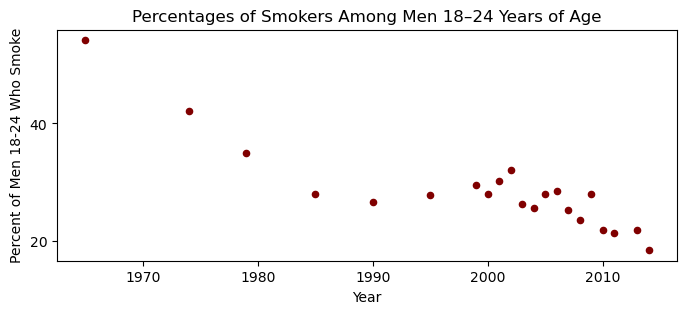

In [8]:
plt.figure(figsize=(8,3));
plt.scatter(year, male, color='maroon', s=20);
plt.xlabel('Year');
plt.ylabel('Percent of Men 18-24 Who Smoke');
plt.xticks([1970, 1980, 1990, 2000, 2010]);
plt.yticks(list(range(20, 51, 20)));
plt.title('Percentages of Smokers Among Men 18–24 Years of Age');

**a) Is there a clear pattern? Describe the trend.**

**Answer:** Yes, the ~~scatterport~~ *scatterplot* has a consistent ~~trent~~ *trend* from the upper left to the lower right, ~~and~~ *suggesting* a negative association.  The percentage of men who smoke descreased began 1985, however, the percentage of men who somke increased in 1995, and the percentage of men who smoke only have about 20 percent in about 2014.

**[NOTE] To describe the trend**:

1. Positive or negative?  (Negative)
2. Straight enough?  (Maybe okay, or maybe not so much)
3. Outliers?  (1960s)
4. Plot thickens?  (Can hardly tell)

**b) Is the association strong?**

**Answer:** Yes, the assocition between Year and the Percent of age in 18 to 24 who smoke is strong ~~and negative~~, but the form is not straight.

In [11]:
linfit.fit(np.array(year).reshape(-1,1), 
           np.array(male));
print(f"Linear Correlation Coefficient: {np.corrcoef(year, male)[0][1]:.3f}")

Linear Correlation Coefficient: -0.877


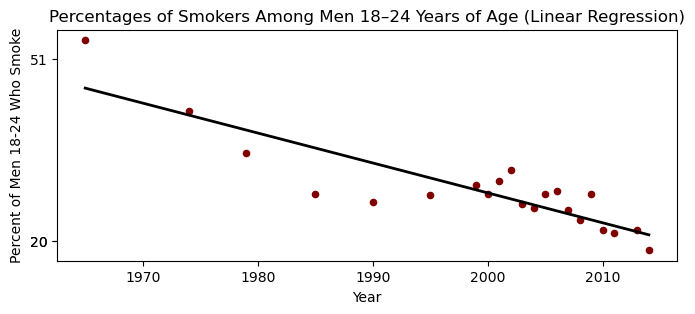

In [12]:
plt.figure(figsize=(8,3));
plt.scatter(year, male, color='maroon', s=20);
plt.plot(year, linfit.predict(np.array(year).reshape(-1,1)), color='k', lw=2)
plt.xlabel('Year');
plt.ylabel('Percent of Men 18-24 Who Smoke');
plt.xticks([1970, 1980, 1990, 2000, 2010]);
plt.yticks([20, 51, 20]);
plt.title('Percentages of Smokers Among Men 18–24 Years of Age (Linear Regression)');

**c) Is a linear model appropriate? Explain.**

**Answer:** Yes, a linear model is appropriate. The above scatterport shows a line that fit and close to the most of the data, that means the residual between the predicted value and observed value is small, and the predicted value and the observed value is very close.

**[NOTE] Need to reexamine the residual plot**

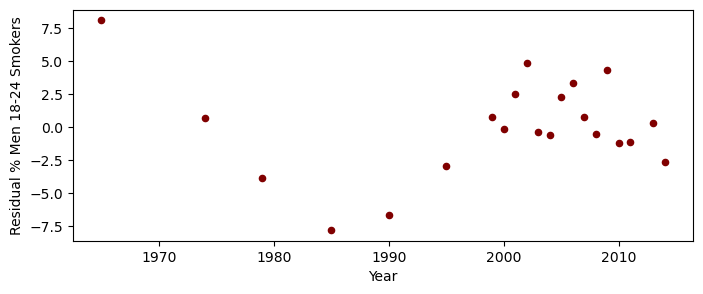

In [17]:
err_male = male - linfit.predict(np.array(year).reshape(-1,1))
plt.figure(figsize=(8,3));
plt.scatter(year, err_male, color='maroon', s=20);
plt.xlabel('Year');
plt.ylabel('Residual % Men 18-24 Smokers');

Although there is no clear pattern in the residual plot, suggesting that the regression analysis has probably captured most pattern in the data, there appears to be a cutoff in the 1990s.  The residuals display different characteristics before and after this cutoff, transitioning from a period of sharp decline to randomness afterwards.

**28. Smoking 2014, women and men In Exercise 22, we exam- ined the percentage of men aged 18–24 who smoked from 1965 to 2014 according to the Centers for Disease Control and Prevention. How about women? Here’s a scatterplot showing the corresponding percentages for both men and women along with least squares lines for each.:**

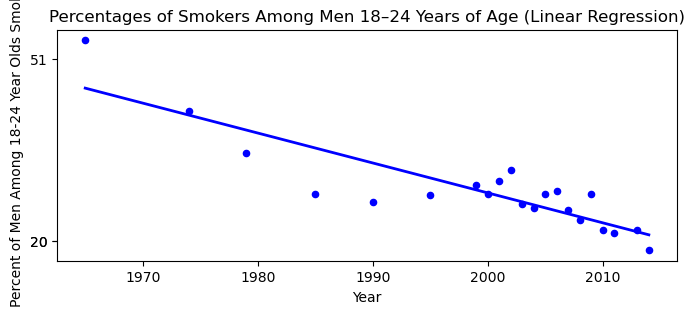

In [18]:
plt.figure(figsize=(8,3));
plt.scatter(year, male, color='blue', s=20);
linfit.fit(np.array(year).reshape(-1, 1), np.array(male))
plt.plot(year, linfit.predict(np.array(year).reshape(-1,1)), color='blue', lw=2)
plt.xlabel('Year');
plt.ylabel('Percent of Men Among 18-24 Year Olds Smoke');
plt.xticks([1970, 1980, 1990, 2000, 2010]);
plt.yticks([20, 51, 20]);
plt.title('Percentages of Smokers Among Men 18–24 Years of Age (Linear Regression)');

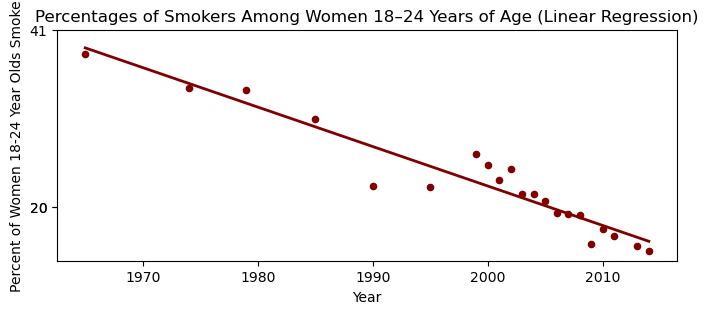

In [20]:
year = smoking['Year']
female = smoking['female']
plt.figure(figsize=(8,3));
plt.scatter(year, female, color='maroon', s=20);
linfit.fit(np.array(year).reshape(-1,1), 
           np.array(female));
plt.plot(year, linfit.predict(np.array(year).reshape(-1,1)), color='maroon', lw=2)
plt.xlabel('Year');
plt.ylabel('Percent of Women 18-24 Year Olds Smoke');
plt.xticks([1970, 1980, 1990, 2000, 2010]);
plt.yticks([20, 41, 20]);
plt.title('Percentages of Smokers Among Women 18–24 Years of Age (Linear Regression)');

**[NOTE] Combine the two sets in the same plot** (See below)

Separating one dataset into several, based on different characters and attributes, is a technique often applied in analysis.

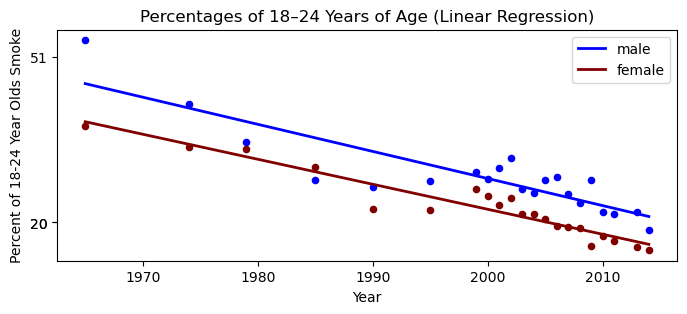

In [21]:
male = smoking['male']
female = smoking['female']
plt.figure(figsize=(8,3))
# scatterplot and linear fit of male
plt.scatter(year, male, color='blue', s=20)
linfit.fit(np.array(year).reshape(-1,1), 
           np.array(male))
plt.plot(year, linfit.predict(np.array(year).reshape(-1,1)), color='blue', lw=2, label='male')
# scatterplot and linear fit of female
plt.scatter(year, female, color='maroon', s=20)
linfit.fit(np.array(year).reshape(-1,1),
           np.array(female))
plt.plot(year, linfit.predict(np.array(year).reshape(-1,1)), color='maroon', lw=2,
        label='female')
# add label and title
plt.xlabel('Year');
plt.ylabel('Percent of 18-24 Year Olds Smoke');
plt.xticks([1970, 1980, 1990, 2000, 2010]);
plt.yticks([20, 51, 20]);
plt.title('Percentages of 18–24 Years of Age (Linear Regression)');
plt.legend();

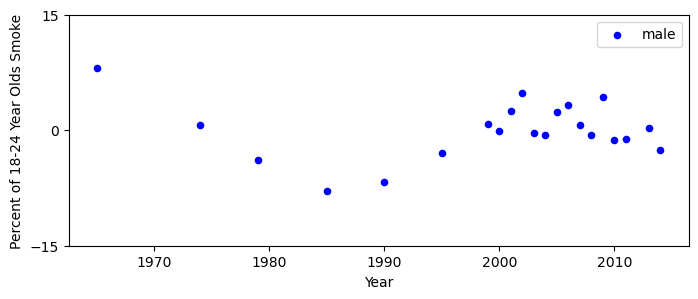

In [24]:
male = smoking['male']
plt.figure(figsize=(8,3))
# residual of male
linfit.fit(np.array(year).reshape(-1,1), 
           np.array(male))
err_male = male - linfit.predict(np.array(year).reshape(-1,1))
plt.scatter(year, err_male, color='blue', s=20, label='male')
# add label and title
plt.xlabel('Year');
plt.ylabel('Percent of 18-24 Year Olds Smoke');
plt.xticks([1970, 1980, 1990, 2000, 2010]);
plt.yticks([-15, 0, 15,]);
plt.legend();

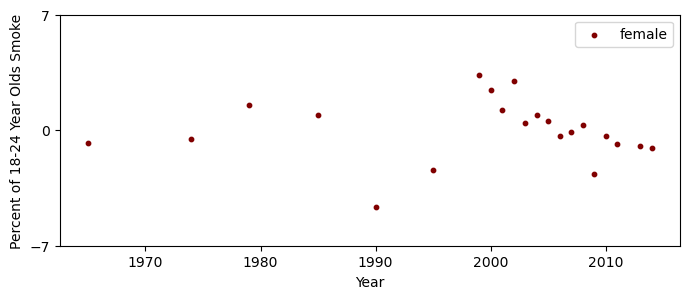

In [27]:
female = smoking['female']
plt.figure(figsize=(8,3))
# residual of female
linfit.fit(np.array(year).reshape(-1,1), 
           np.array(female))
err_female = female - linfit.predict(np.array(year).reshape(-1,1))
plt.scatter(year, err_female, color='maroon', s=10, label='female')
# add label and title
plt.xlabel('Year');
plt.ylabel('Percent of 18-24 Year Olds Smoke');
plt.xticks([1970, 1980, 1990, 2000, 2010]);
plt.yticks([-7, 0, 7]);
plt.legend();

**a) In what ways are the trends in smoking behavior similar for men and women?**



**Answer:** From the year 2000 to 2010, the percentages for smokers among men and women are declined.

Both trends are negative and their slopes seem paralle. A vertical shift.

**[NOTE] Need to examine residual plot to see quality of fit**

**b) How do the smoking rates for women differ from those for men?**

**Answer:** The smoking percentages for women are lower than men.

**c) Viewed alone, the trend for men may have seemed to violate the Linearity Condition. How about the trend for women? Does the consistency of the two patterns encourage you to think that a linear model for the trend in men might be appropriate? (Note: there is no correct answer to this question; it is raised for you to think about.)**

**Answer:** The trend for women shows the percentage of women smoker are declined.  The trend for men also shows the percentage of men smoker are declined as well.  Both scatterpoints look straight enough and no obvious outliers.

*Residual plot of the female data shows a more consistent satisfaction of the linearity condition.*

Similar:
1. negative trend, in parallel
2. denser data in 2000s

Differ:
1. male smokers exhibit higher residuels than female smokers
2. residual plot of male smokers thickens. in contrast, no thickening in female residual plot 
3. male smokers exhibit a bend in 1960s to 1990s.  female plot does not show this bend.
4. male smokers may have outliers at the beginning of the dataset.  no obvious outliers in the female plot.

Based on above, a linear trend, or regression analysis, is appropriate for the female smokers.

As for male smokers, it is questionable, because the data may have violated the linearity condition in that (1) it is not straight enough in that it shows a bend in th 1960s to 1990s; (2) its residual plot thickens; and (3) it may have outliers in the 1960s that should be reexamined or removed.  Therefore, a regression analysis for the male smokers may not be idealy appriprioate, but still a good first trial in understanding what the data may tell us.